<h1 align="center"><font color='green'>X Education</font></h1>

#### Porblem Statement :
X Education sells online courses to industry professionals.

Everyday many professionals who are interested in the courses land on their website and browse for courses.These users are classified as potential leads to take the course.

Currently the conversion rate is very poor. The company wishes to identify the most potential leads, also known as ‘Hot Leads’.

With the Hot Leads, the Sales team will focus more on communicating with the them rather than making calls to everyone.


#### Business Goal :
Help the X Education to select the most promising leads i.e. Hot Leads.

This can be achieved by building a logistic regression model and assigning lead score between 0 and 100 to each of the leads.

A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## <h2 align="left"> <font color='brown'>Importing the libraries</font></h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import header
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
plt.style.use('seaborn')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Libraries for model creation, training and calculating VIF(for Multicollinearity)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

## <h2 align="left"> <font color='brown'>Reading Dataset</font></h2>

In [3]:
# Read datasets
leads = pd.read_csv('Leads.csv')

In [4]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Understanding the datasets
print('No. of Rows and columns :',leads.shape)


No. of Rows and columns : (9240, 37)


In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# columns can be dropped because these are unique numbers
drop_coulms = ['Prospect ID','Lead Number',]
leads.drop(drop_coulms,axis=1,inplace=True)

In [9]:
# columns can be dropped because these are not the key drivers
drop_coulms = ['Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
leads.drop(drop_coulms,axis=1,inplace=True)

In [17]:
# Rename the Column headers
leads.rename(columns = {"How did you hear about X Education":"HeardFrom"}, inplace=True)
leads.rename(columns = {"What matters most to you in choosing a course":"Moto"}, inplace=True)
leads.rename(columns = {"What is your current occupation":"Occupation"}, inplace=True)
leads.rename(columns = {"Receive More Updates About Our Courses":"GetUpdates"}, inplace=True)


In [18]:
#Categorical Values cleanup

leads['Asymmetrique Activity Index'] = leads['Asymmetrique Activity Index'].replace({'01.High': 'High', '02.Medium': 'Medium', '03.Low': 'Low'})
leads['Asymmetrique Profile Index'] = leads['Asymmetrique Activity Index'].replace({'01.High': 'High', '02.Medium': 'Medium', '03.Low': 'Low'})

In [19]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Country                                 6779 non-null   object 
 10  Specialization                          7802 non-null   obje


## <h2 align="left"> <font color='brown'>Impute/Remove missing values</font></h2>

In [20]:
# changing select to Nan
leads = leads.replace('Select',np.nan)

In [21]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
HeardFrom                                 78.463203
Occupation                                29.112554
Motto                                     29.318182
Search                                     0.000000
Magazine                                   0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Adve

In [22]:
# Will remove those values having missing values more than 40 percent
def drop_cols():
  for col in leads.columns:
    if((100*(leads[col].isnull().sum()/len(leads.index))) >= 40):
      leads.drop(col,1, inplace=True)

In [23]:
drop_cols()

In [24]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
Occupation                                29.112554
Motto                                     29.318182
Search                                     0.000000
Magazine                                   0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Reco

Further analysis on other missing values
#### Country

In [25]:
leads.Country.value_counts()
# Country is a categorical variable and we can see that mode of India is more. Hence will impute all the missing values to India

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [26]:
leads['Country'] = leads.Country.replace(np.nan,'India')

#### Specialization

In [27]:
leads.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [28]:
# Will distribute the null values in other categories of specialization
def impute_null_values(column_name,value):
  null_value = int(round(leads[column_name].isna().sum() / value))
  categories = leads[column_name].unique()
  filtered_array = categories[~pd.isna(categories)]
  for col_index in range(0,value):
    null_indices = leads[leads[column_name].isna()][column_name].index[:null_value]
    leads.loc[null_indices,column_name] = filtered_array[col_index]

In [29]:
impute_null_values('Specialization',10)

In [30]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                    0.000000
Specialization                             0.000000
Occupation                                29.112554
Motto                                     29.318182
Search                                     0.000000
Magazine                                   0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Reco

#### Occupation

In [32]:
leads['Occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [75]:
leads['Occupation'].isnull().sum()

0

In [35]:
impute_null_values('Occupation',6)

In [74]:
leads.Occupation = leads.Occupation.replace(np.nan,'Unemployed')

In [76]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
Occupation                                0.0
Motto                                     0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
GetUpdates                                0.0
Tags                              

#### Motto

In [41]:
leads['Motto'].value_counts()


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: Motto, dtype: int64

In [42]:
leads['Motto'].isnull().sum()

2709

In [43]:
leads['Motto'] = leads['Motto'].replace(np.nan,'Better Career Prospects')

In [44]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                    0.000000
Specialization                             0.000000
Occupation                                 0.021645
Motto                                      0.000000
Search                                     0.000000
Magazine                                   0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Reco

#### Tags

In [45]:
leads.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [46]:
leads.Tags.isnull().sum()

3353

In [47]:
impute_null_values('Tags',20)

In [48]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                    0.000000
Specialization                             0.000000
Occupation                                 0.021645
Motto                                      0.000000
Search                                     0.000000
Magazine                                   0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Reco

#### City

In [49]:
leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [50]:
leads.City.isnull().sum()

3669

In [51]:
impute_null_values('City',6)

In [52]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                               0.000000
Lead Source                               0.389610
Do Not Email                              0.000000
Do Not Call                               0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Country                                   0.000000
Specialization                            0.000000
Occupation                                0.021645
Motto                                     0.000000
Search                                    0.000000
Magazine                                  0.000000
Newspaper Article                         0.000000
X Education Forums                        0.000000
Newspaper                                 0.000000
Digital Advertisement                     0.000000
Through Recommendations        

#### Lead Source

In [53]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [54]:
leads['Lead Source'].isnull().sum()

36

In [55]:
impute_null_values('Lead Source',6)

#### Last Activity

In [56]:
leads['Last Activity'].value_counts()


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [57]:
leads['Last Activity'].isnull().sum()

103

In [58]:
impute_null_values('Last Activity',2)

#### TotalVisits,Page Views Per Visit,Last Activity

In [65]:
leads[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [66]:
leads[['TotalVisits','Page Views Per Visit']].isnull().sum()

TotalVisits             137
Page Views Per Visit    137
dtype: int64

In [67]:
leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan,leads['TotalVisits'].mean())

In [68]:
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan,leads['Page Views Per Visit'].mean())

In [77]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
Occupation                                0.0
Motto                                     0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
GetUpdates                                0.0
Tags                              

# <h2 align="left"> <font color='brown'>Data Visualization</font></h2>

#### Numeric Variable

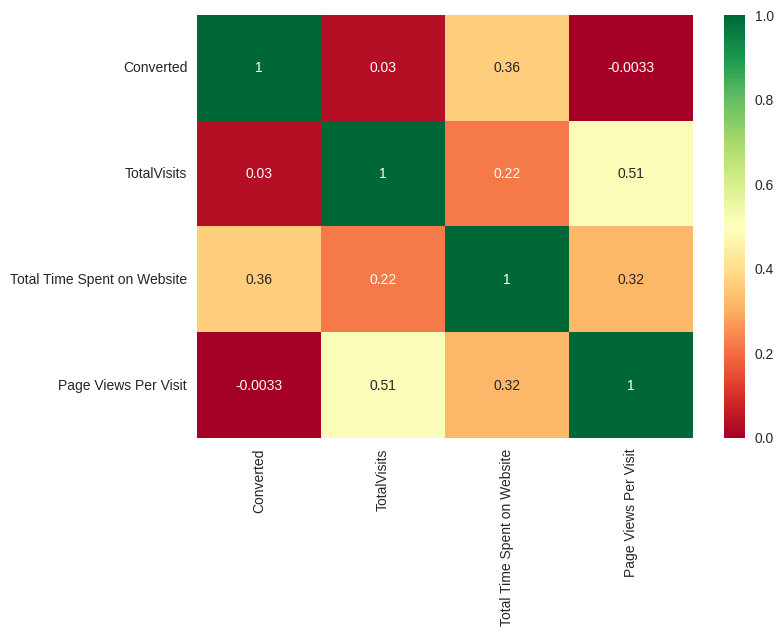

In [78]:
# Numerical Variables
num_category = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

sns.heatmap(leads[num_category].corr(), cmap="RdYlGn", annot=True)
plt.show()

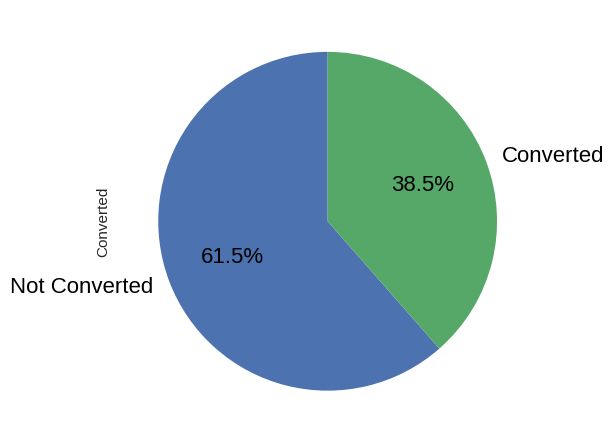

In [79]:
# Target
target = round(leads.Converted.value_counts(normalize=True)*100,2)
x = ['Not Converted','Converted']
target.plot.pie(labels=x,autopct='%1.1f%%',
                textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)
plt.show()

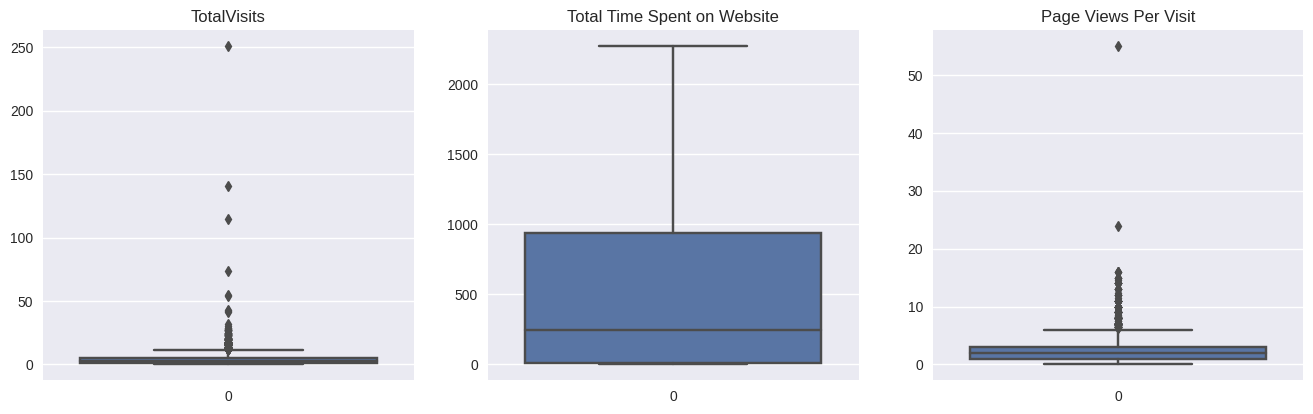

In [80]:
# Box plot
plt.figure(figsize=(22,10))
plt.subplot(2,4,1)
plt.title('TotalVisits')
sns.boxplot(leads.TotalVisits)
plt.subplot(2,4,2)
plt.title('Total Time Spent on Website')
sns.boxplot(leads['Total Time Spent on Website'])
plt.subplot(2,4,3)
plt.title('Page Views Per Visit')
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [81]:
# TotalVisits and Page Views Per Visit has outliers
leads[['TotalVisits','Page Views Per Visit']].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.445238,2.362820
std,4.818723,2.145333
min,0.000000,0.000000
5%,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000
95%,10.000000,6.000000


In [82]:
# Correcting outliers from medians
def replace_outliers_with_median(column,value):
  indices = leads[leads[column] > value].TotalVisits.index
  leads.loc[indices,column] = leads[column].median()



In [83]:
replace_outliers_with_median('Page Views Per Visit',9)
replace_outliers_with_median('TotalVisits',9)

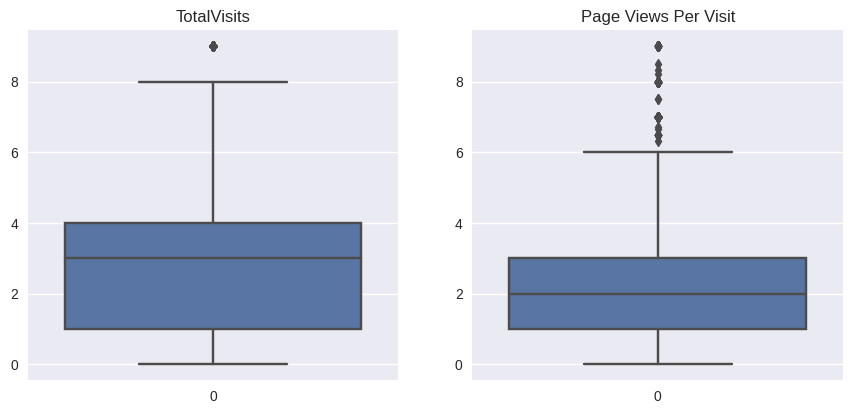

In [84]:
# Box Plots after outlier treatment
plt.figure(figsize=(22,10))
plt.subplot(2,4,1)
plt.title('TotalVisits')
sns.boxplot(leads.TotalVisits)
plt.subplot(2,4,2)
plt.title('Page Views Per Visit')
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

#### Categorical Data

In [85]:
# User defined function Used for visualisation

#Sub Plot

def subplot(features):
    for i in range(0,len(features)):
        #print(features[i])
        plt.subplot(2, 2,i+1)
        chart = (sns.countplot(x=leads[features[i]],hue=leads.Converted))

        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

         # Adding and formatting title
         #plt.title(features[i], fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})

        # Labeling Axes
        plt.xlabel(features[i], fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
        plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
        plt.show()


#Count Plot

def count_plot(feature_name,hue,plot_title,x_lablel,y_lablel):
    chart = (sns.countplot(x=leads[feature_name],hue=hue))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

    # Adding and formatting title
    plt.title(plot_title, fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})

    # Labeling Axes
    plt.xlabel(x_lablel, fontdict={'fontsize': 8, 'fontweight' : 8, 'color' : 'Brown'})
    plt.ylabel(y_lablel, fontdict={'fontsize': 8, 'fontweight' : 8, 'color' : 'Brown'})
    plt.show()

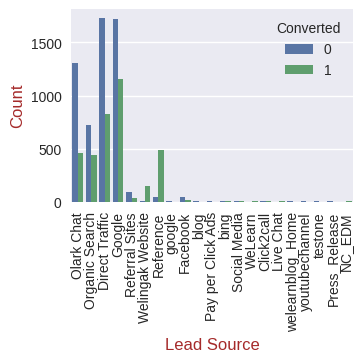

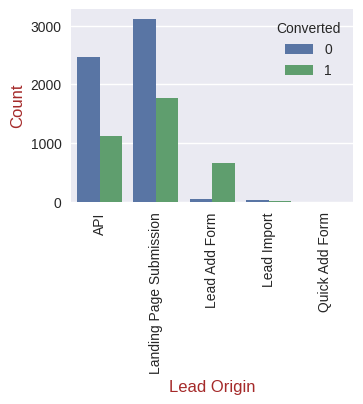

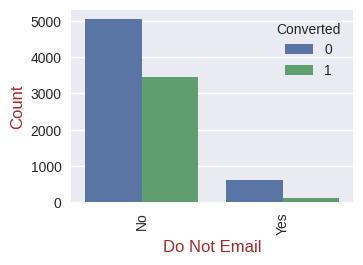

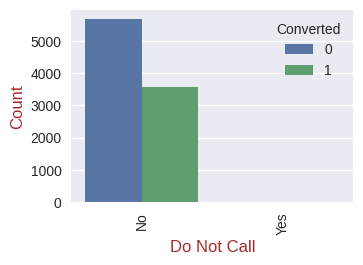

In [86]:
features = ['Lead Source','Lead Origin','Do Not Email','Do Not Call']
subplot(features)

# Data is highly skwed for Do Not call, Mostly all the data is pointing to No, hence will not make sense evaluating this feature
leads.drop('Do Not Call',axis=1,inplace=True)

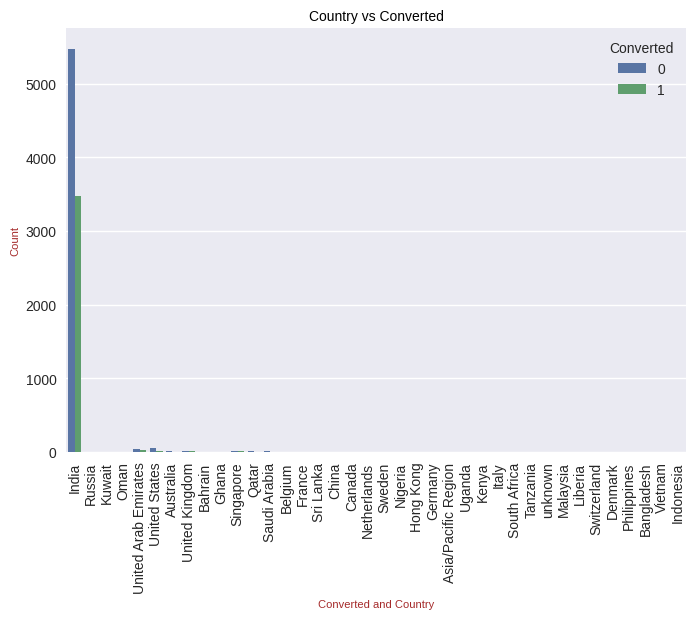

In [87]:
count_plot('Country',leads.Converted,'Country vs Converted',
           'Converted and Country','Count')

# Data is highly skwed for India, Mostly all the data is pointing to India, hence will not make sense evaluating this feature
leads.drop('Country',axis=1,inplace=True)

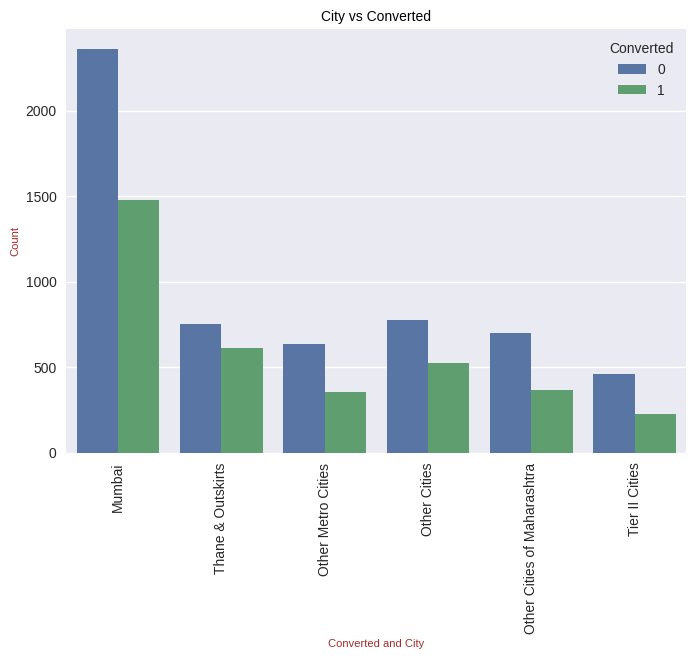

In [88]:
count_plot('City',leads.Converted,'City vs Converted',
           'Converted and City','Count')

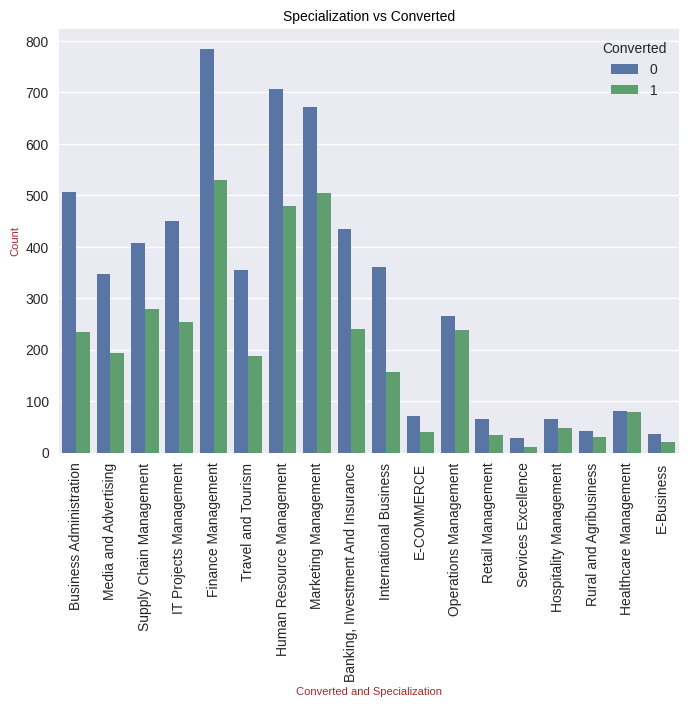

In [89]:

count_plot('Specialization',leads.Converted,'Specialization vs Converted',
           'Converted and Specialization','Count')

In [91]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   Occupation                              9240 non-null   object 
 10  Motto                                   9240 non-null   obje

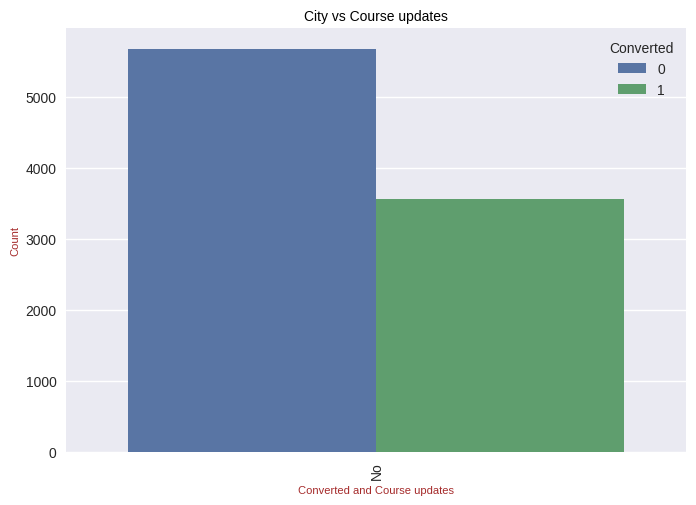

In [94]:
count_plot('GetUpdates',leads.Converted,'City vs Course updates',
           'Converted and Course updates','Count')


# Receive More Updates About Our Courses can be droped because of skewness in the data
leads.drop('GetUpdates',axis=1,inplace=True)

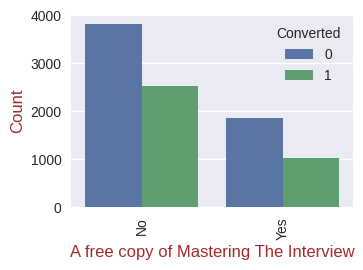

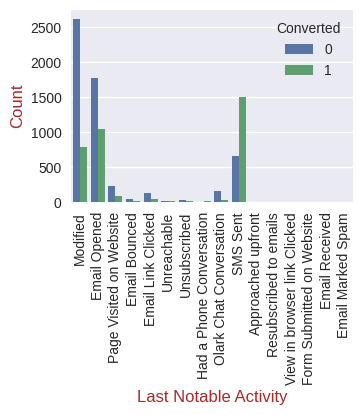

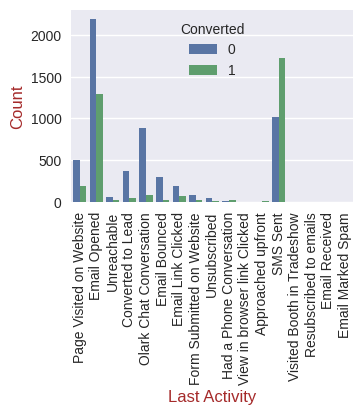

In [96]:
features = ['A free copy of Mastering The Interview','Last Notable Activity','Last Activity']
subplot(features)

# droping the columns - A free copy of Mastering The Interview because it is not putting any value in the analysis
# Last Notable Activity','Last Activity both are same, hence dropping Last Notable Activity
leads.drop(['A free copy of Mastering The Interview','Last Notable Activity'],axis=1,inplace=True)

# <h2 align="left"> <font color='brown'>Data Preperation</font></h2>

#### Dummy value creation

In [97]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   object 
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Occupation                   9240 non-null   object 
 10  Motto                        9240 non-null   object 
 11  Search                       9240 non-null   object 
 12  Magazine                     9240 non-null   object 
 13  Newspaper Article 

In [98]:
categorical = leads.select_dtypes(include=['object']).columns

In [99]:
def make_binary_dummy(columlist):
  return columlist.map({'No':0,'Yes':1})


catergory_list = ['Do Not Email','Search','Magazine','Newspaper Article',
                  'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']

leads[catergory_list] = leads[catergory_list].apply(make_binary_dummy)

In [101]:
lead_origin = pd.get_dummies(leads['Lead Origin'],drop_first=True)
lead_source = pd.get_dummies(leads['Lead Source'],drop_first = True)
last_activity = pd.get_dummies(leads['Last Activity'],drop_first = True)
speciality = pd.get_dummies(leads['Specialization'],drop_first = True)
current_occu = pd.get_dummies(leads['Occupation'],drop_first = True)
reason_choose_course = pd.get_dummies(leads['Motto'],drop_first = True)
tag = pd.get_dummies(leads['Tags'],drop_first = True)
location = pd.get_dummies(leads['City'],drop_first = True)

In [102]:
leads = pd.concat([leads,lead_origin,lead_source,last_activity,current_occu,reason_choose_course,tag,location], axis = 1)

In [103]:
leads.shape

(9240, 97)

In [104]:
leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Occupation',
            'Motto','Tags','City'],axis = 1,inplace = True )

#### Scale variable

In [105]:
columns_to_scale = ['Total Time Spent on Website','Page Views Per Visit','TotalVisits']
scale = MinMaxScaler()
leads[columns_to_scale] = scale.fit_transform(leads[columns_to_scale])

In [106]:
leads[columns_to_scale]

,Total Time Spent on Website,Page Views Per Visit,TotalVisits
0,0.000000,0.000000,0.000000
1,0.296655,0.277778,0.555556
2,0.674296,0.222222,0.222222
3,0.134243,0.111111,0.111111
4,0.628521,0.111111,0.222222
...,...,...,...
9235,0.812060,0.296667,0.888889
9236,0.104754,0.222222,0.222222
9237,0.087588,0.222222,0.222222
9238,0.219630,0.333333,0.333333


## <h2 align="left"> <font color='brown'>Model Preperation</font></h2>

In [107]:
leads_train,leads_test = train_test_split(leads,train_size=0.7,test_size=0.3,
                                          random_state=100)

In [108]:
leads_train.shape

(6468, 89)

In [109]:
y_train = leads_train.pop('Converted')
X_train = leads_train

In [110]:
y_test = leads_test.pop('Converted')
X_test = leads_test


In [111]:
X_train.shape

(6468, 88)

# <h2 align="left"> <font color='brown'>Model Training</font></h2>

#### Model 1

In [137]:
# Function to create model
def model_creation(X,y):
    model = sm.GLM(y,X,family = sm.families.Binomial()).fit()
    print(model.summary())
    return model

# Function to calculate VIF
def vif_calculator (X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [138]:
lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [139]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Search', False, 25),
 ('Magazine', False, 68),
 ('Newspaper Article', False, 43),
 ('X Education Forums', False, 27),
 ('Newspaper', False, 46),
 ('Digital Advertisement', False, 15),
 ('Through Recommendations', False, 47),
 ('Landing Page Submission', False, 18),
 ('Lead Add Form', True, 1),
 ('Lead Import', True, 1),
 ('Quick Add Form', False, 34),
 ('Direct Traffic', False, 39),
 ('Facebook', True, 1),
 ('Google', False, 54),
 ('Live Chat', False, 65),
 ('NC_EDM', False, 17),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 53),
 ('Pay per Click Ads', False, 66),
 ('Press_Release', False, 55),
 ('Reference', False, 60),
 ('Referral Sites', False, 26),
 ('Social Media', False, 44),
 ('WeLearn', False, 64),
 ('Welingak Website', True, 1),
 ('bing', False, 20),
 ('blog', False, 11),
 ('google', False, 38),
 ('testone', False, 69),
 ('welearnbl

In [140]:
selected_column = X_train.columns[rfe.support_]
not_selected_column = X_train.columns[~rfe.support_]

In [141]:
selected_column

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Add Form',
       'Lead Import', 'Facebook', 'Olark Chat', 'Welingak Website',
       'Converted to Lead', 'Olark Chat Conversation', 'SMS Sent', 'Housewife',
       'Unemployed', 'Working Professional', 'Closed by Horizzon',
       'In confusion whether part time or DLP', 'Interested in other courses',
       'Lost to EINS', 'Ringing', 'Will revert after reading the email',
       'switched off'],
      dtype='object')

In [142]:
not_selected_column

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Landing Page Submission', 'Quick Add Form', 'Direct Traffic', 'Google',
       'Live Chat', 'NC_EDM', 'Organic Search', 'Pay per Click Ads',
       'Press_Release', 'Reference', 'Referral Sites', 'Social Media',
       'WeLearn', 'bing', 'blog', 'google', 'testone', 'welearnblog_Home',
       'youtubechannel', 'Email Bounced', 'Email Link Clicked',
       'Email Marked Spam', 'Email Opened', 'Email Received',
       'Form Submitted on Website', 'Had a Phone Conversation',
       'Page Visited on Website', 'Resubscribed to emails', 'Unreachable',
       'Unsubscribed', 'View in browser link Clicked',
       'Visited Booth in Tradeshow', 'Other', 'Student',
       'Flexibility & Convenience', 'Other', 'Busy',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Interested 

In [151]:
X_train_rfe_selected = X_train[selected_column]
X_train_rfe_selected.shape

(6468, 20)

In [153]:
X_train_rfe_selected_with_constant = sm.add_constant(X_train_rfe_selected)
model_1 = model_creation(X_train_rfe_selected_with_constant,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1656.0
Date:                Fri, 12 Jan 2024   Deviance:                       3312.1
Time:                        16:19:01   Pearson chi2:                 9.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5584
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [154]:
vif_calculator(X_train_rfe_selected_with_constant)

                                Variables        VIF
4                             Lead Import  16.699061
5                                Facebook  16.686685
0                                   const  10.147471
12                             Unemployed   2.121567
13                   Working Professional   1.740100
19    Will revert after reading the email   1.693762
3                           Lead Add Form   1.551051
6                              Olark Chat   1.487783
18                                Ringing   1.456612
2             Total Time Spent on Website   1.366772
9                 Olark Chat Conversation   1.310172
11                              Housewife   1.281511
7                        Welingak Website   1.263440
14                     Closed by Horizzon   1.254487
16            Interested in other courses   1.248131
10                               SMS Sent   1.163480
20                           switched off   1.108686
17                           Lost to EINS   1.

## Model 2

In [155]:
# Facebook is having figh VIF and high p value
X_train_rfe_selected_with_constant_revised = X_train_rfe_selected_with_constant.drop('Facebook',axis=1)

In [156]:
model_2 = model_creation(X_train_rfe_selected_with_constant_revised,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1656.2
Date:                Fri, 12 Jan 2024   Deviance:                       3312.3
Time:                        16:44:33   Pearson chi2:                 9.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5584
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### <h2 align="left"> <font color='brown'>Model Evaluation</font></h2>

In [157]:
y_train_pred = model_2.predict(X_train_rfe_selected_with_constant_revised)

In [158]:
y_train_pred.head()

1871    0.013232
6795    0.140993
3516    0.016199
8105    0.206009
3934    0.170919
dtype: float64

In [159]:
y_train_pred_final = pd.DataFrame()
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final['ID'] = y_train_pred.index

In [160]:
y_train_pred_final[:10]

,Converted,Converted_prob,ID
0,0,NaN,1871
1,0,0.015105,6795
2,0,0.905661,3516
3,0,NaN,8105
4,0,0.911279,3934
5,1,0.009838,4844
6,0,0.979477,3297
7,1,0.009838,8071
8,0,0.017810,987
9,1,0.017375,7423


In [161]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final[:10]

,Converted,Converted_prob,ID,Predicted
0,0,NaN,1871,0
1,0,0.015105,6795,0
2,0,0.905661,3516,1
3,0,NaN,8105,0
4,0,0.911279,3934,1
5,1,0.009838,4844,0
6,0,0.979477,3297,1
7,1,0.009838,8071,0
8,0,0.017810,987,0
9,1,0.017375,7423,0


In [162]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2920 1082]
 [1818  648]]


In [163]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.551638837353123
